<a href="https://colab.research.google.com/github/PU-WEI-LU/Maching_learning_project/blob/main/bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**-------------Regression Model-------------**

#Importing the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!head /content/drive/MyDrive/求職專案資料/bikedata_day.csv

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
8,2011-01-08,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959
9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/求職專案資料/bikedata_day.csv', parse_dates=[1])
#更改日期型態=datetime64 [1]=dteday column

In [ ]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
dataset.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

# Data processing

In [ ]:
# instant 為連號，預測不需使用，因此刪除
dataset = dataset.drop('instant', axis=1)

In [ ]:
# 項目名稱中文化

columns = [
    '日期',  '季節',  '年份', '月份', '國定假日', '星期幾', '工作日', '天氣', 
    '氣溫', '體感溫度',  '濕度', '風速',
    '臨時用戶租借量', '註冊用戶租借量', '整體用戶租借量'
]

# 將項目名稱替換成中文
dataset.columns = columns
print(dataset.columns)

Index(['日期', '季節', '年份', '月份', '國定假日', '星期幾', '工作日', '天氣', '氣溫', '體感溫度', '濕度',
       '風速', '臨時用戶租借量', '註冊用戶租借量', '整體用戶租借量'],
      dtype='object')


In [ ]:
display(dataset.head())
#display 是表格形式

,日期,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,臨時用戶租借量,註冊用戶租借量,整體用戶租借量
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
display(dataset.tail())

,日期,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,臨時用戶租借量,註冊用戶租借量,整體用戶租借量
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
dataset.isnull().sum()

日期         0
季節         0
年份         0
月份         0
國定假日       0
星期幾        0
工作日        0
天氣         0
氣溫         0
體感溫度       0
濕度         0
風速         0
臨時用戶租借量    0
註冊用戶租借量    0
整體用戶租借量    0
dtype: int64

In [ ]:
dataset.iloc[:,1:]

,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,臨時用戶租借量,註冊用戶租借量,整體用戶租借量
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
# 下載台北思源黑體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-01-17 07:30:28--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.214.101, 173.194.214.138, 173.194.214.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.214.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hdn579vpqasofmj97v6ggc7goakj7f5k/1673940600000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=914cd270-9573-4927-adeb-0b4a0b86d3bf [following]
--2023-01-17 07:30:29--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hdn579vpqasofmj97v6ggc7goakj7f5k/1673940600000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=914cd270-9573-4927-adeb-0b4a0b86d3bf
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.12.132, 2607:f8b0:400c:c08::84
Connecting to do

In [ ]:
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"]=False

In [ ]:
plt.rcParams["savefig.dpi"]=150 #圖片像素
plt.rcParams["figure.dpi"]=150

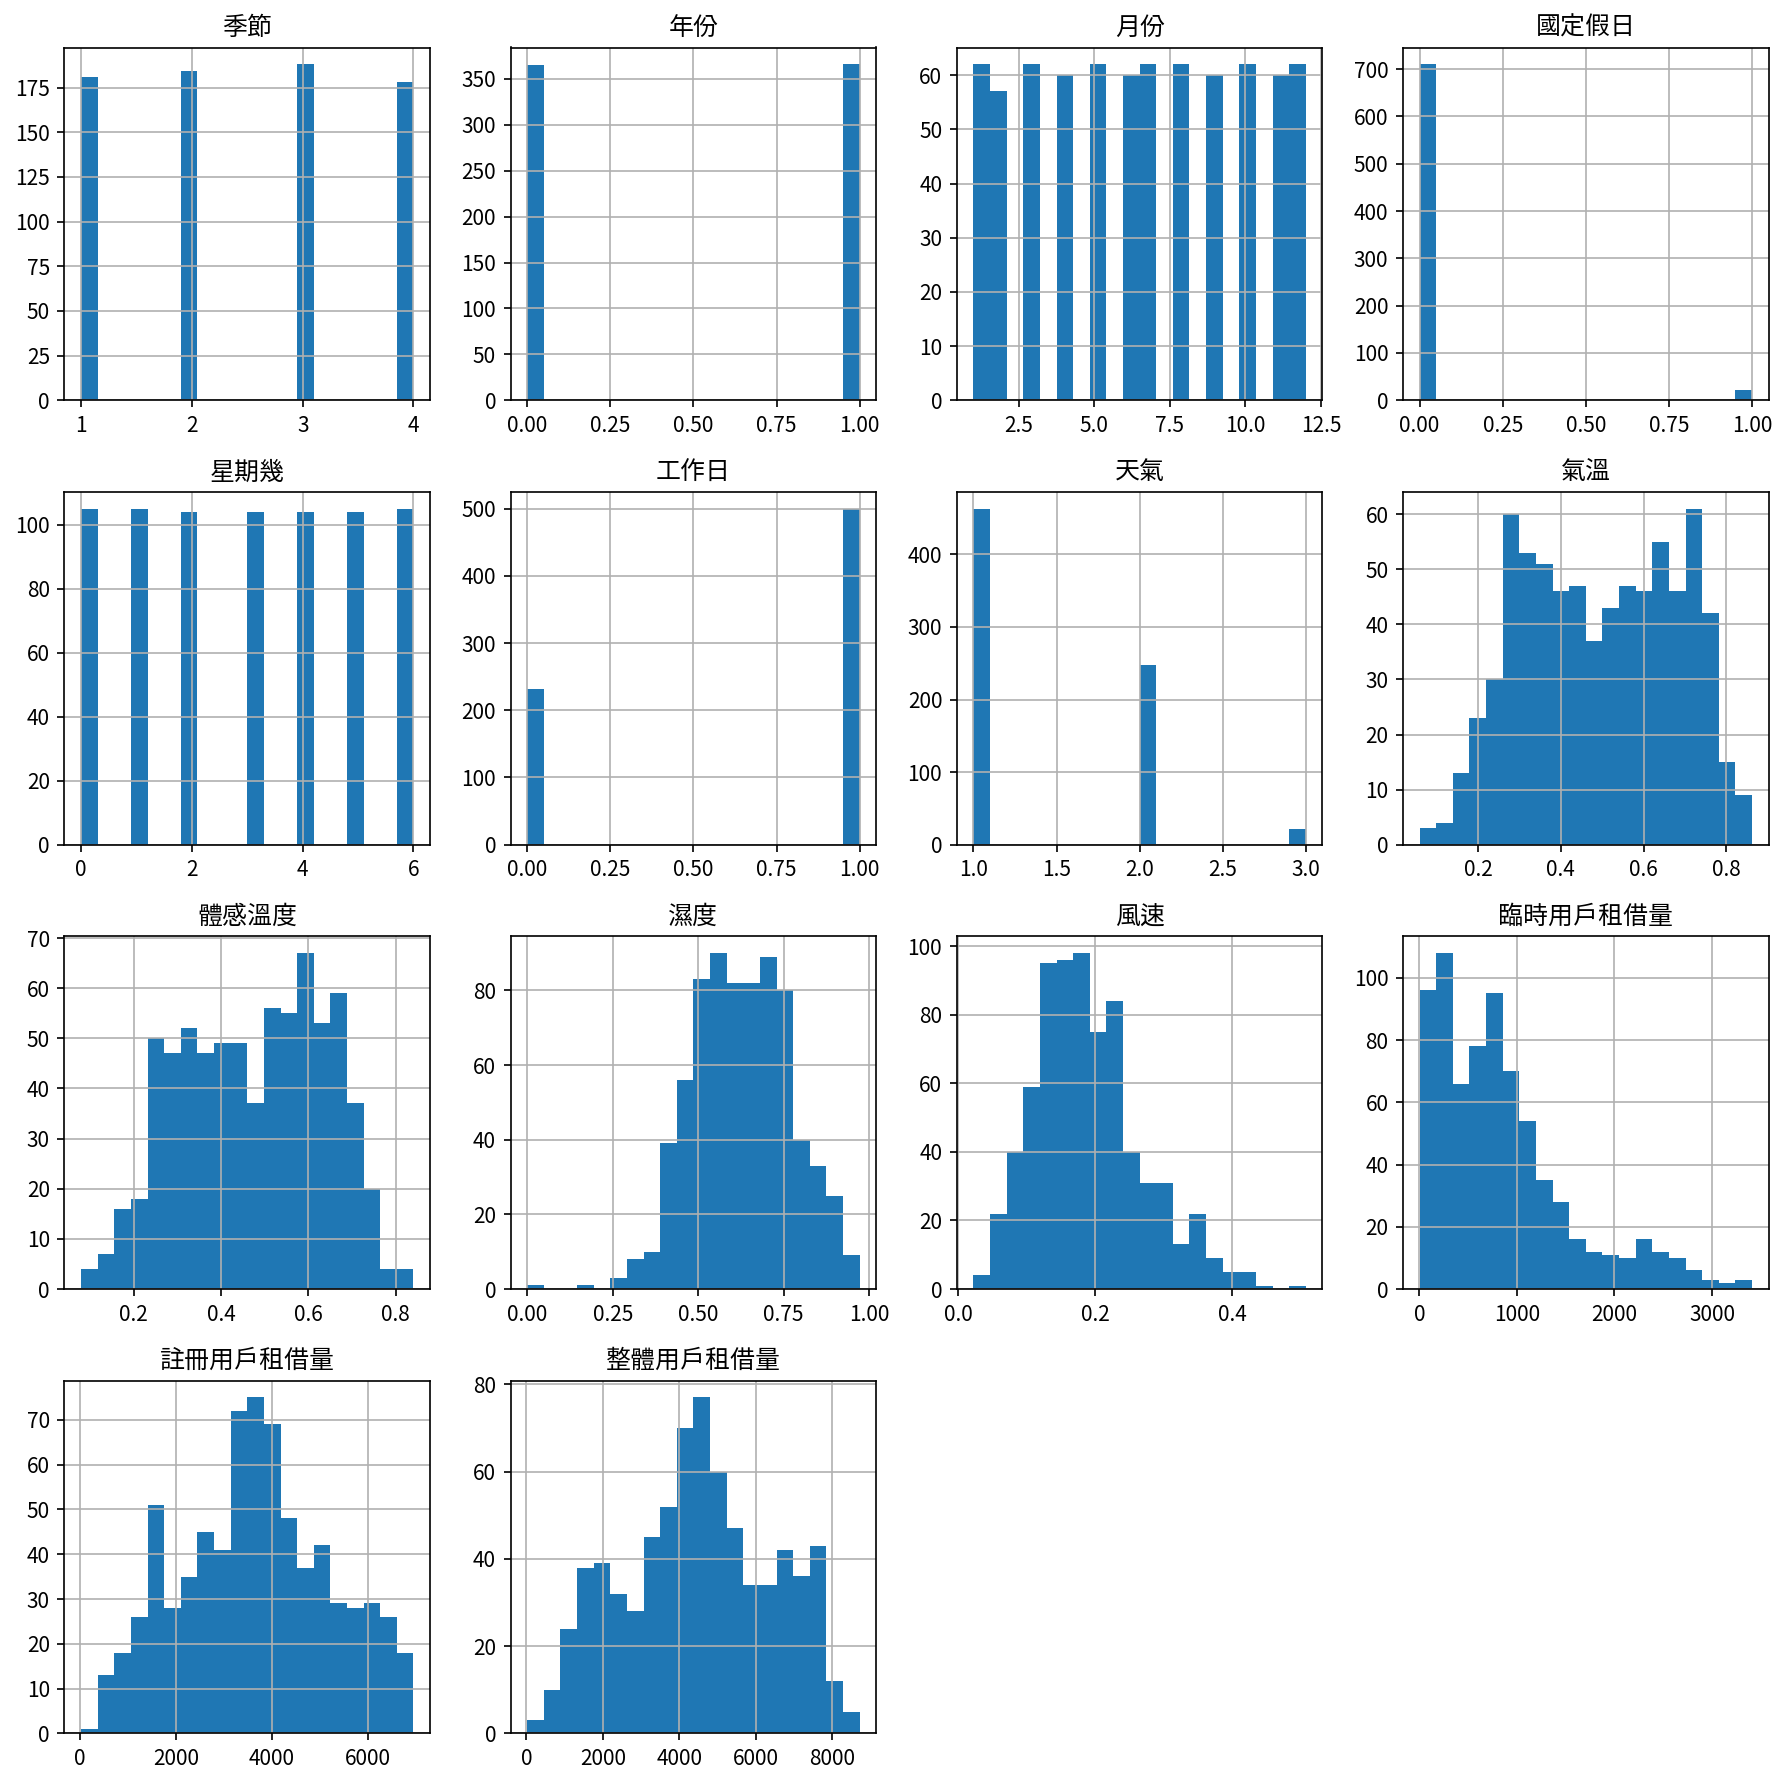

In [ ]:
#繪製直方圖

from pylab import rcParams
rcParams["figure.figsize"]=(12,12)
#dataset.iloc[:,1:].hist()


dataset.iloc[:,1:].hist(bins=20)
#自動調整個子圖位置，避免重疊或顯示不完全
plt.tight_layout()
plt.show()

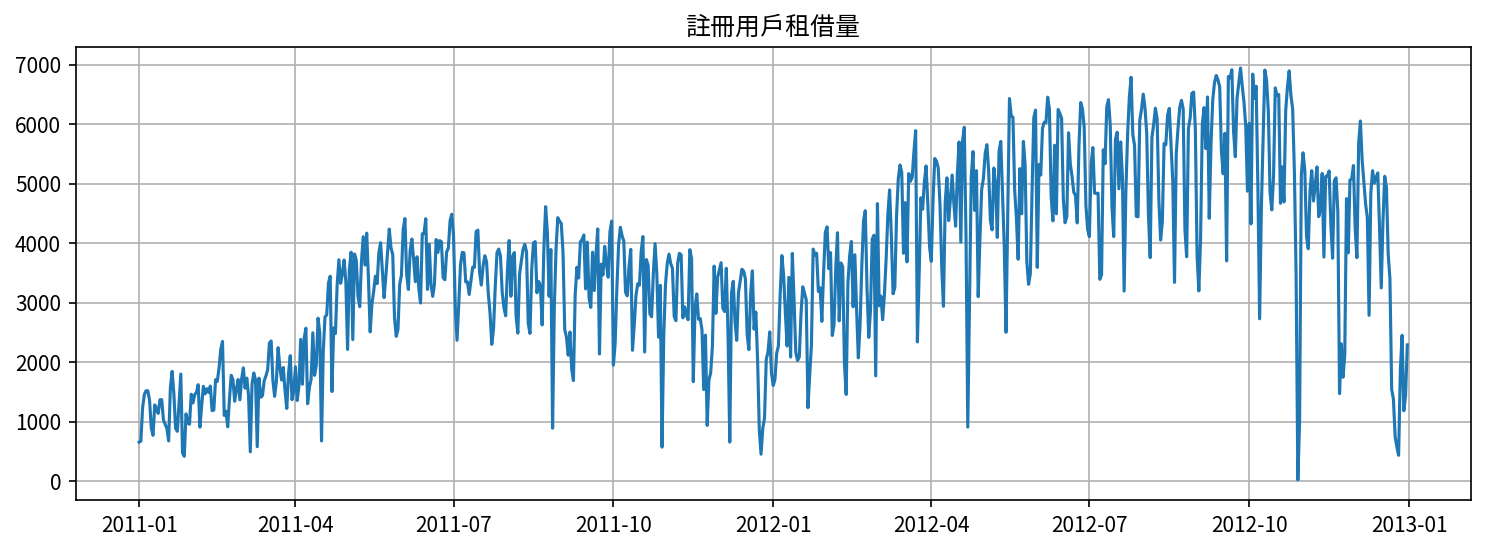

In [ ]:
#繪製註冊用戶租借列的時間序列圖

#畫布
plt.figure(figsize=(12,4))

#折線圖
plt.plot(dataset["日期"],dataset["註冊用戶租借量"]) # , c="b"

#網格與標題
plt.grid()
plt.title("註冊用戶租借量")
plt.show()       

In [ ]:
dataset.columns

Index(['日期', '季節', '年份', '月份', '國定假日', '星期幾', '工作日', '天氣', '氣溫', '體感溫度', '濕度',
       '風速', '臨時用戶租借量', '註冊用戶租借量', '整體用戶租借量'],
      dtype='object')

# Spliting dataset 

In [ ]:
#分割Xy
X = dataset.drop(["日期","註冊用戶租借量","臨時用戶租借量",'整體用戶租借量'], axis=1)
y = dataset["註冊用戶租借量"]

In [ ]:
X.head()

,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


In [ ]:
# 分割日
mday = pd.to_datetime("2012-11-1") #轉乘timestamp
# 建立tain、test的filter
train_filter = dataset["日期"] < mday
test_filter = dataset["日期"] >= mday
X_train = X[train_filter] #用filter不用加"""
X_test = X[test_filter]

y_train = y[train_filter]
y_test = y[test_filter]

#分割日期資料
dates_test = dataset["日期"][test_filter]



In [ ]:
#確定訓練、測試集大小
print(X_train.shape)
print(X_test.shape)
#確認頭尾結果
display(X_train.tail())
display(X_test.head())

(670, 11)
(61, 11)


,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速
665,4,1,10,0,6,0,2,0.530000,0.515133,0.720000,0.235692
666,4,1,10,0,0,0,2,0.477500,0.467771,0.694583,0.398008
667,4,1,10,0,1,1,3,0.440000,0.439400,0.880000,0.358200
668,4,1,10,0,2,1,2,0.318182,0.309909,0.825455,0.213009
669,4,1,10,0,3,1,2,0.357500,0.361100,0.666667,0.166667


,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速
670,4,1,11,0,4,1,2,0.365833,0.369942,0.581667,0.157346
671,4,1,11,0,5,1,1,0.355000,0.356042,0.522083,0.266175
672,4,1,11,0,6,0,2,0.343333,0.323846,0.491250,0.270529
673,4,1,11,0,0,0,1,0.325833,0.329538,0.532917,0.179108
674,4,1,11,0,1,1,1,0.319167,0.308075,0.494167,0.236325


# Machine learing

In [ ]:
from xgboost import XGBRegressor
#利用MSE解決迴歸問題
xgb = XGBRegressor(objective = "reg:squarederror", rondom_state =1)

#TRAIN
xgb.fit(X_train,y_train)

#TEST
y_pred = xgb.predict(X_test)

#確認結果
print(y_pred[:5])



[4613.577  4863.4756 4057.923  3642.1284 4354.408 ]


#Evaluating with R-Square

In [ ]:
#score函式 計算R2
Accuracy = xgb.score(X_test, y_test)

#利用 SKLEARN
from sklearn.metrics import r2_score
r2_score =r2_score(y_test, y_pred)

print ("R-Square(score method) = %.4f "  %Accuracy)
print ("R-Square(sklearn method) = %.4f " %r2_score)

R-Square(score method) = 0.5294 
R-Square(sklearn method) = 0.5294 


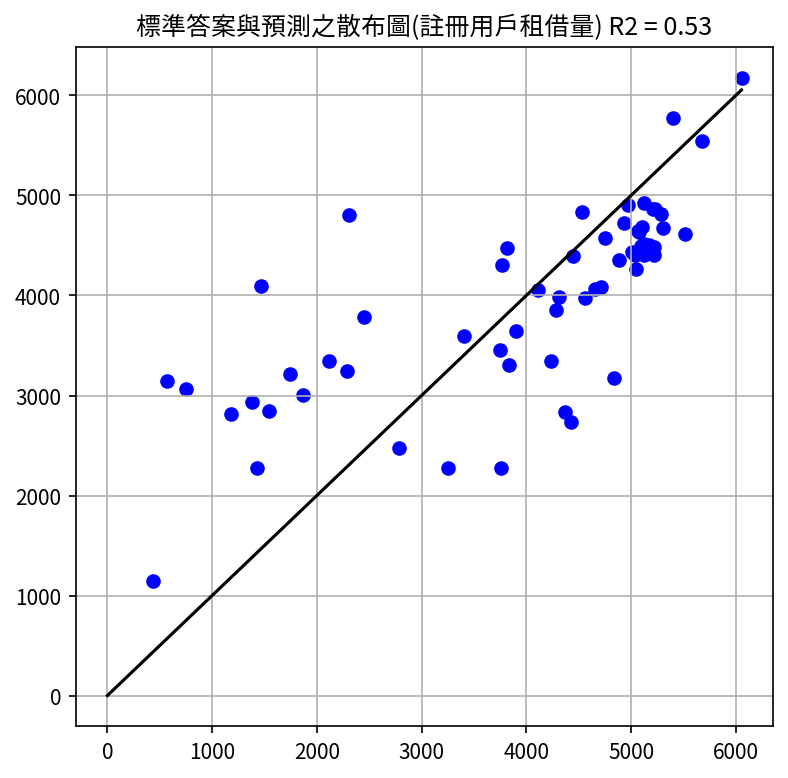

In [ ]:
#繪製散布圖比較標準答案與預測值

plt.figure(figsize =(6,6))
y_max = y_test.max()
plt.plot((0, y_max), (0, y_max), c="k")
plt.scatter(y_test, y_pred, c="b")

plt.title("標準答案與預測之散布圖(註冊用戶租借量) R2 = %.2f" %Accuracy)
#plt.title(f'標準答案與預測之散布圖(註冊用戶租借量) R2={Accuracy:.4f}')
plt.grid()
plt.show()



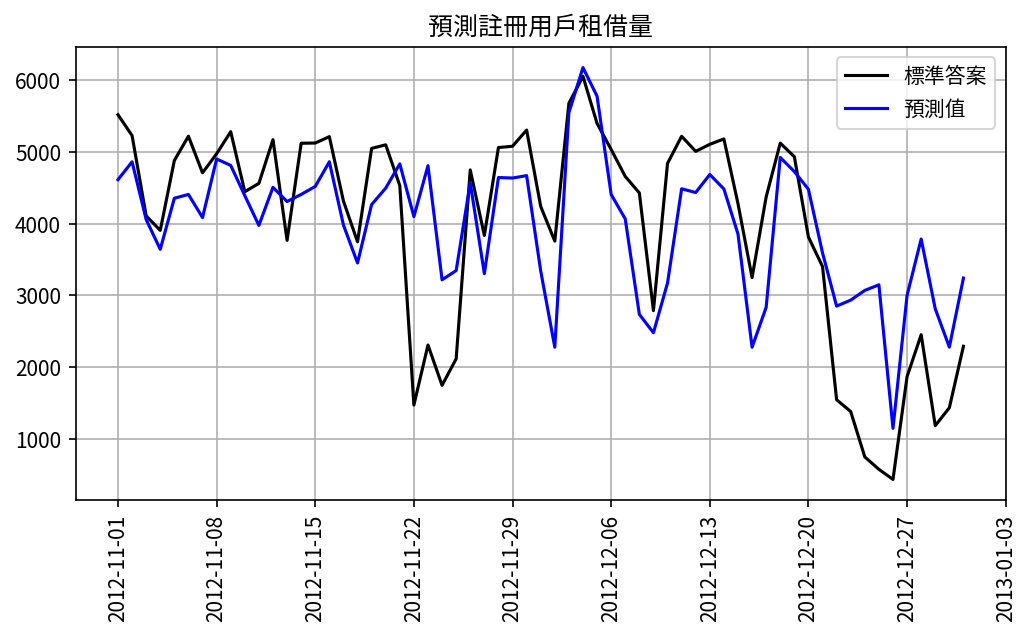

In [ ]:
#繪製時間序列圖

import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

#繪製圖形
ax.plot(dates_test, y_test,label="標準答案", c="k")
ax.plot(dates_test, y_pred,label="預測值", c="b")

#日期刻度間隔
#於每週四顯示日期
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

#旋轉日期標籤
ax.tick_params(axis="x", rotation=90)

ax.grid()
ax.legend()
ax.set_title("預測註冊用戶租借量")
plt.show()

# Adjusting with one hot

In [ ]:
# 用於對項目進行 One-Hot 編碼之函式
# drop_first 避免虛擬變數陷阱
def get_dum(dataset, column):
    #將所有變數能編碼的進行編碼 
    dataset_dummy = pd.get_dummies(dataset[column], prefix=column, drop_first = True)
    #刪除原始欄位並連結one hot編碼的欄位，#axis=1 縱向合併(第二個)
    dataset = pd.concat([dataset.drop([column],axis=1),dataset_dummy],axis=1)
    return dataset
#分開寫
#drop_dataset = dataset.drop([column],axis=1)
#dataset = pd.concat([dataset, dataset_dummy]xaxis=1 )
#X= pd.get_dummies(data = X, columns = ['Geography'] , prefix = ['Geography'] , drop_first = True)



In [ ]:
# 對「月份」與「季節」進行 One-Hot 編碼

X2 = X.copy()
X2 = get_dum(X2, '月份')
X2 = get_dum(X2, '季節')

# 確認結果
display(X2.head())

,年份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,月份_2,...,月份_6,月份_7,月份_8,月份_9,月份_10,月份_11,月份_12,季節_2,季節_3,季節_4
0,0,0,6,0,2,0.344167,0.363625,0.805833,0.160446,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,0.363478,0.353739,0.696087,0.248539,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0.196364,0.189405,0.437273,0.248309,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,0.200000,0.212122,0.590435,0.160296,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,0.226957,0.229270,0.436957,0.186900,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
display(dataset["季節"].value_counts(ascending=True).sort_index(ascending=True))

1    181
2    184
3    188
4    178
Name: 季節, dtype: int64

In [ ]:
display(dataset["月份"].value_counts(ascending=True).sort_index(ascending=True))

1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: 月份, dtype: int64

In [ ]:
# 註冊用戶模型（調整後）

# 以 mday 為基準分割輸入資料
X2_train = X2[train_filter]
X2_test = X2[test_filter]

#　選擇演算法
xgb2 = XGBRegressor(objective ='reg:squarederror',
    random_state=1)

# 訓練
xgb2.fit(X2_train, y_train)

# 預測
y_pred2 = xgb2.predict(X2_test)

# 確認預測結果
print(y_pred2[:5])

[4265.3364 4594.3247 3614.5537 3297.526  4159.295 ]


In [ ]:
# 評估（註冊用戶）（調整後）

# 呼叫 score 函式
score2 = xgb2.score(X2_test, y_test)

# 確認結果
print(f'score: {score2:.4f}')

score: 0.5894


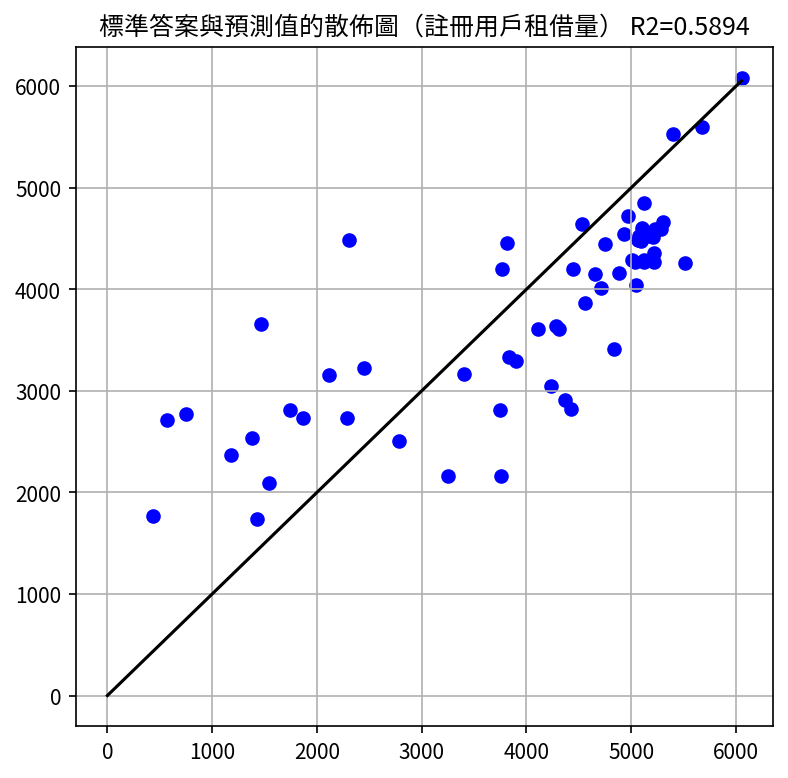

In [ ]:
# 利用散佈圖比較標準答案與預測值（註冊用戶）
plt.figure(figsize=(6,6))
y_max = y_test.max()
plt.plot((0,y_max), (0, y_max), c='k')
plt.scatter(y_test, y_pred2, c='b')
plt.title(f'標準答案與預測值的散佈圖（註冊用戶租借量） R2={score2:.4f}')
plt.grid()
plt.show()

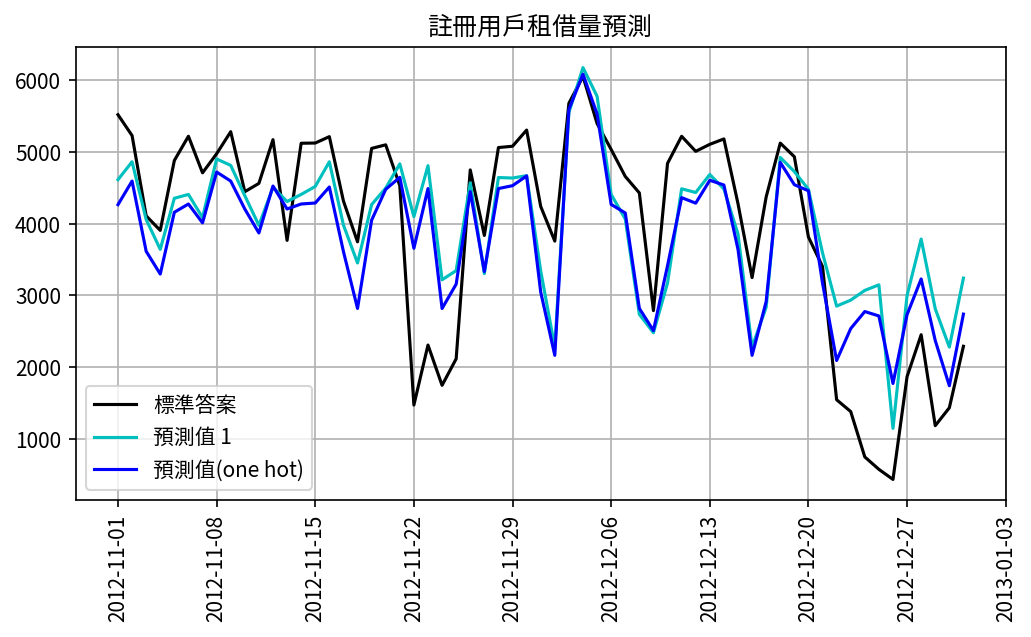

In [ ]:
# 繪製時間序列圖（調整後 註冊用戶租借量）
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

# 繪製圖形
ax.plot(dates_test, y_test, label='標準答案', c='k')
ax.plot(dates_test, y_pred, label='預測值 1', c='c')
ax.plot(dates_test, y_pred2, label='預測值(one hot)', c='b')

# 日期刻度間隔
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

# 日期格式
ax.tick_params(axis='x', rotation=90)

# 顯示網格等
ax.grid()
ax.legend()
ax.set_title('註冊用戶租借量預測')

# 輸出畫面
plt.show()

#Importance analysis

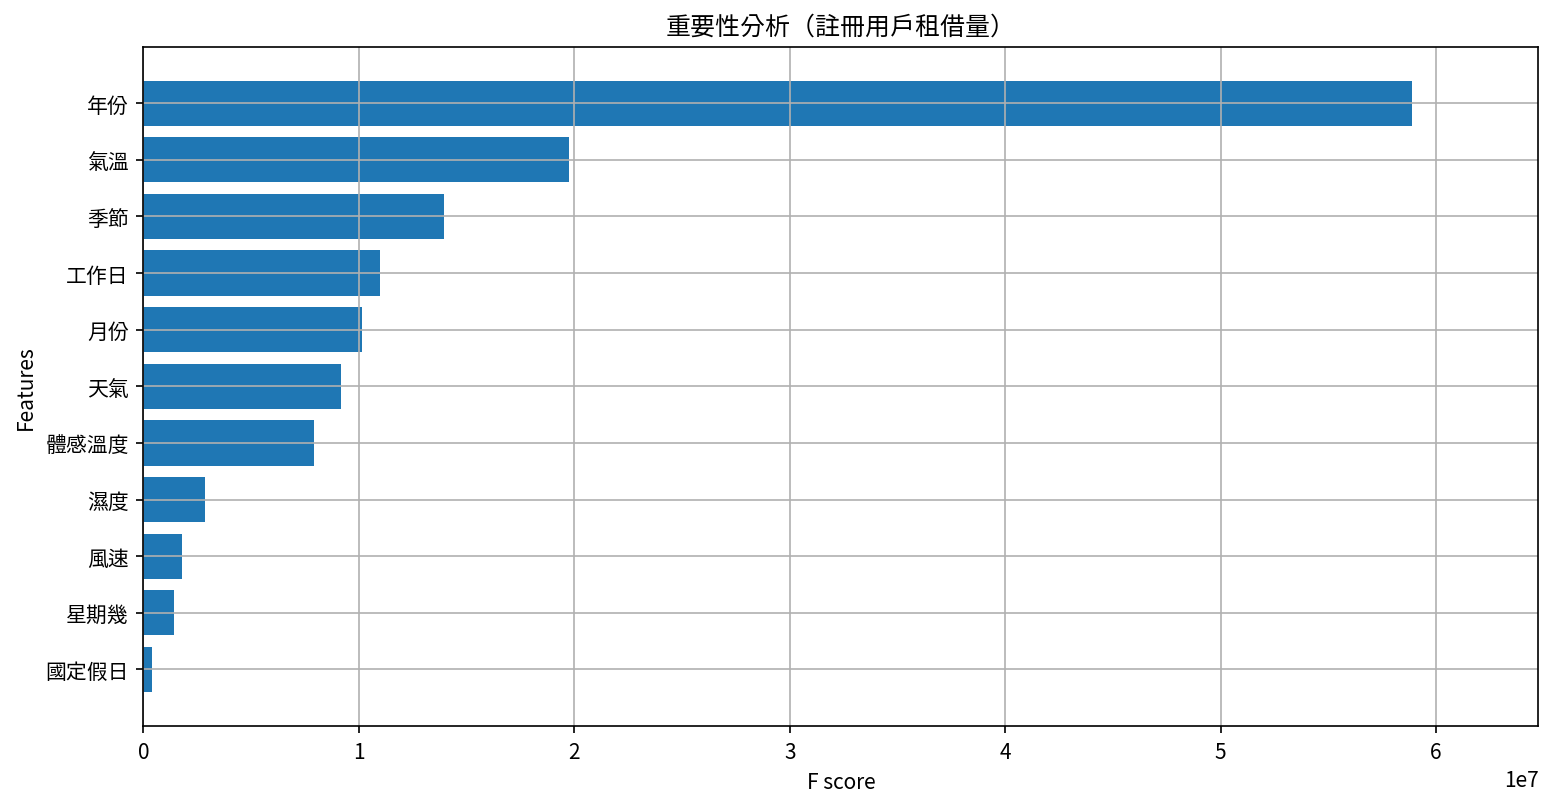

In [ ]:
# 對註冊用戶租借量進行重要性分析
import xgboost 
fig, ax = plt.subplots(figsize=(12, 6))
xgboost.plot_importance(xgb, ax=ax, height=0.8,
    importance_type='gain', show_values=False,
    title='重要性分析（註冊用戶租借量）')
plt.show()

# **-----------Time series model------------**



In [ ]:
# 只提取「日期」與「註冊用戶租借量」
# 以「日期：ds、註冊用戶租借量：y」替換行名，建立資料框 df2

# 複製整個資料框
datedata = dataset.copy()

# 提取「日期」與「註冊用戶租借量」的行
datedata = datedata[['日期', '註冊用戶租借量']]

# 替換行名
datedata.columns = ['ds', 'y']

# 確認結果
display(datedata.head())

,ds,y
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518


In [ ]:
# 設定分割日 mday
mday = pd.to_datetime('2012-11-1')

# 建立訓練用 index 與驗證用 filter
traindate_filter = datedata['ds'] < mday
testdate_filter = datedata['ds'] >= mday

# 分割輸入資料
Xdate_train = datedata[traindate_filter]
Xdate_test = datedata[testdate_filter]

# 分割日期資料（用於繪製圖形）
dates_test = datedata['ds'][testdate_filter]

In [ ]:
display(Xdate_train.head(5))
display(Xdate_test.head(5))
display(dates_test.head(5))

,ds,y
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518


,ds,y
670,2012-11-01,5520
671,2012-11-02,5229
672,2012-11-03,4109
673,2012-11-04,3906
674,2012-11-05,4881


670   2012-11-01
671   2012-11-02
672   2012-11-03
673   2012-11-04
674   2012-11-05
Name: ds, dtype: datetime64[ns]

In [ ]:
##install FB Prophet and yfinance
!pip install prophet
!pip install yfinance
##import pd, plt and Prophet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
from prophet import Prophet

In [ ]:
# 選擇模型
# 這 3 個 seasonality 參數的設定很重要
# 本資料為日單位，因此不需使用 daily_seasonality
# weekly_seasonality 與 daily_seasonality 除了 True/False 以外，
# 也可以指定成數值（三角函數的數量）weekly_seasonality=4 (default=3) yearly_seasonality(default=10) 用越多三角函數組合，越會發生過度擬合
# seasonality_mode: additive(預設)差異人數 multiplicative差異比率

time_loop= Prophet(yearly_seasonality = True, weekly_seasonality = True, daily_seasonality=False, seasonality_mode="multiplicative")

#Training and predicting

In [ ]:
# 訓練
time_loop.fit(Xdate_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfn6zio0c/3brilolb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfn6zio0c/aiizbaam.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90317', 'data', 'file=/tmp/tmpfn6zio0c/3brilolb.json', 'init=/tmp/tmpfn6zio0c/aiizbaam.json', 'output', 'file=/tmp/tmpfn6zio0c/prophet_model5q_oq2px/prophet_model-20230117074700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 建立預測用的資料
# （只含有日期 ds 的資料框）
# 61 為欲預測之天數（2012-11-1 到 2012-12-31）
# freq='D' 以天為單位
future1 = time_loop.make_future_dataframe(periods=61, freq='D')

# 確認結果
display(future1.head())
display(future1.tail())

,ds
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05


,ds
726,2012-12-27
727,2012-12-28
728,2012-12-29
729,2012-12-30
730,2012-12-31


In [ ]:
#預測
bike_pred = time_loop.predict(future1)

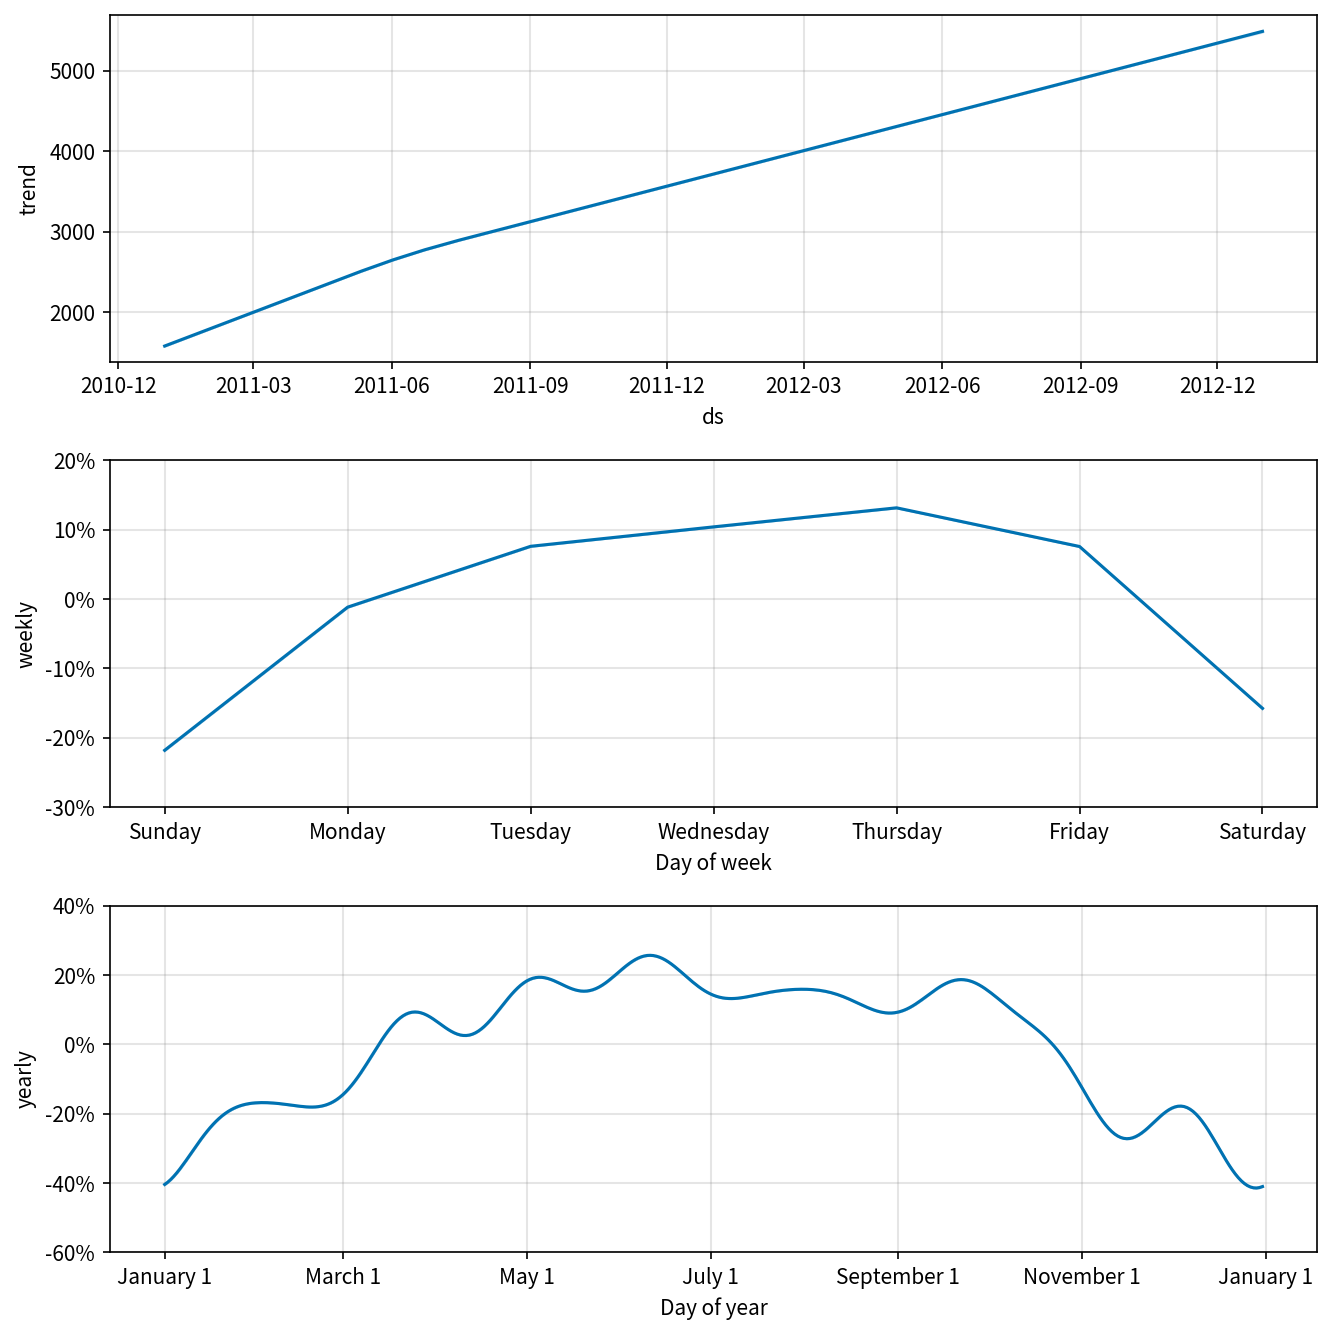

In [ ]:
#繪製圖形
fig = time_loop.plot_components(bike_pred)
plt.show()


# Drawing graphics

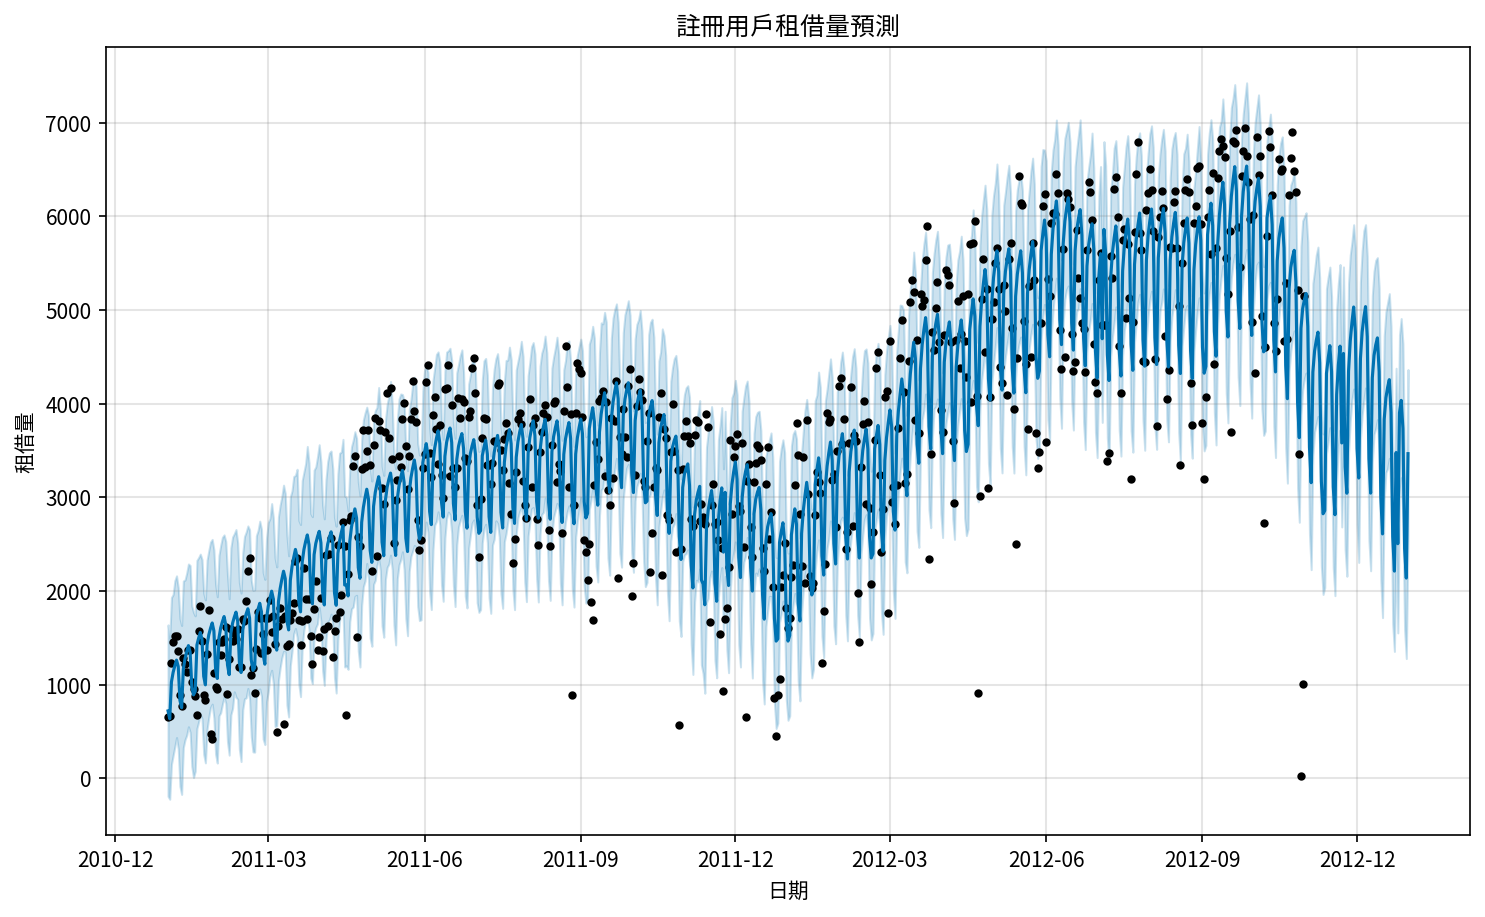

In [ ]:
# 將整體訓練資料與驗證資料繪製成圖形
fig, ax = plt.subplots(figsize=(10,6))

# 繪製預測結果的圖形（prophet 的函式）
time_loop.plot(bike_pred, ax=ax)

# 設定標題等
ax.set_title('註冊用戶租借量預測')
ax.set_xlabel('日期')
ax.set_ylabel('租借量')

# 繪製圖形
plt.show()

#Evaluatting with R-Square

In [ ]:
# ypred1：只從 bike_pred 中提取預測部分
ypred1 = bike_pred[-61:][['yhat']].values

# ytest1：預測期間內的標準答案
ytest1 = Xdate_test['y'].values

# 計算 R2 值
from sklearn.metrics import r2_score
score = r2_score(ytest1, ypred1)

# 確認結果
print(f'R2 score:{score:.4f}')

R2 score:0.3705


# Drawing time series graphics

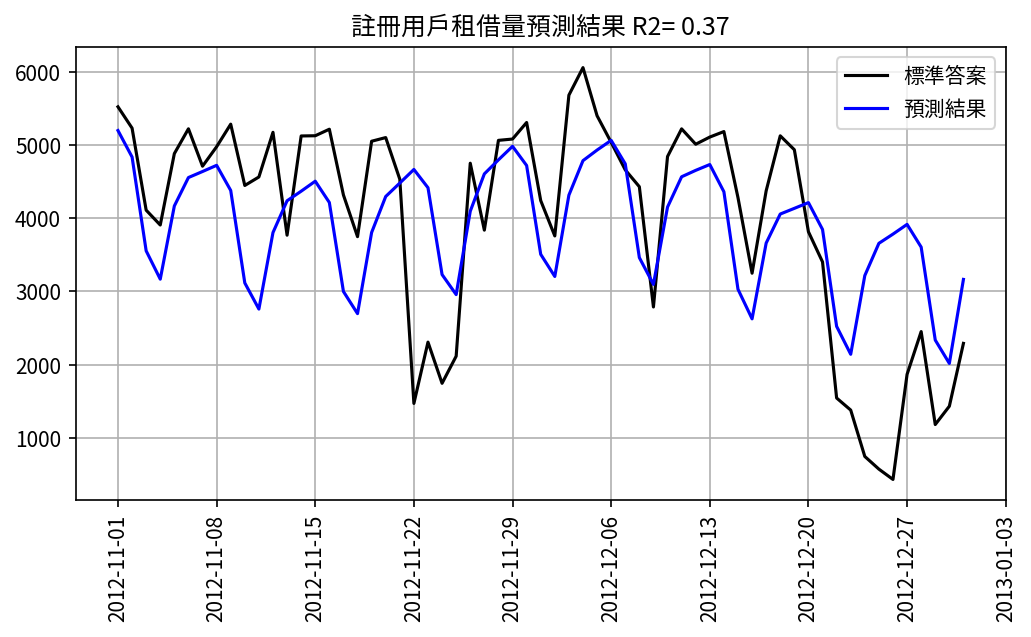

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

# 繪製圖形
ax.plot(dates_test, ytest1, label='標準答案', c='k')
ax.plot(dates_test, ypred1, label='預測結果', c='b')

# 日期刻度間隔
# 於每週四顯示日期
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

# 將日期刻度標籤文字旋轉 90 度
ax.tick_params(axis='x', rotation=90)

# 顯示網格等
ax.grid()
ax.legend()
ax.set_title('註冊用戶租借量預測結果 R2= %.2f' %score)

# 輸出畫面
plt.show()

# Adding holiday

In [ ]:
#挑出國定假日
dataset_holiday = dataset[dataset["國定假日"]==1]

display(dataset_holiday.head(5))

,日期,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,臨時用戶租借量,註冊用戶租借量,整體用戶租借量
16,2011-01-17,1,0,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117,883,1000
51,2011-02-21,1,0,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,195,912,1107
104,2011-04-15,2,0,4,1,5,0,1,0.446667,0.441913,0.671250,0.226375,642,2484,3126
149,2011-05-30,2,0,5,1,1,0,1,0.733333,0.671092,0.685000,0.131225,1549,2549,4098
184,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043


In [ ]:
#只提出國定假日日期
holidays = dataset_holiday["日期"].values
print(holidays[:5])

['2011-01-17T00:00:00.000000000' '2011-02-21T00:00:00.000000000'
 '2011-04-15T00:00:00.000000000' '2011-05-30T00:00:00.000000000'
 '2011-07-04T00:00:00.000000000']


In [ ]:
#轉換為資料框格式

df_holiday = pd.DataFrame({"holiday":"holi",         #將假日名稱定為holi
               "ds":holidays,         #ds為上方取出的holidays日期
               "lower_window":0,       #假日之前幾日會受到影響
               "upper_window":0})       #假日之後幾日會受到影響

#確認結果
display(df_holiday.head())
display(df_holiday.tail())

,holiday,ds,lower_window,upper_window
0,holi,2011-01-17,0,0
1,holi,2011-02-21,0,0
2,holi,2011-04-15,0,0
3,holi,2011-05-30,0,0
4,holi,2011-07-04,0,0


,holiday,ds,lower_window,upper_window
16,holi,2012-09-03,0,0
17,holi,2012-10-08,0,0
18,holi,2012-11-12,0,0
19,holi,2012-11-22,0,0
20,holi,2012-12-25,0,0


In [ ]:
display(Xdate_train.head())

,ds,y
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518


,ds,y
665,2012-10-27,5209
666,2012-10-28,3461
667,2012-10-29,20
668,2012-10-30,1009
669,2012-10-31,5147


In [ ]:
#增加holiday後重新fit演算法
time_loop_holiday = Prophet(yearly_seasonality = True, weekly_seasonality = True, daily_seasonality=False, holidays=df_holiday, seasonality_mode="multiplicative")
#訓練
time_loop_holiday = time_loop_holiday.fit(Xdate_train)
#預測
bike_pred_holiday = time_loop_holiday.predict(future1)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfn6zio0c/yrvm2sfk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfn6zio0c/m97x7xaz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32260', 'data', 'file=/tmp/tmpfn6zio0c/yrvm2sfk.json', 'init=/tmp/tmpfn6zio0c/m97x7xaz.json', 'output', 'file=/tmp/tmpfn6zio0c/prophet_modely4nt4ya4/prophet_model-20230117090911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:09:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:09:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


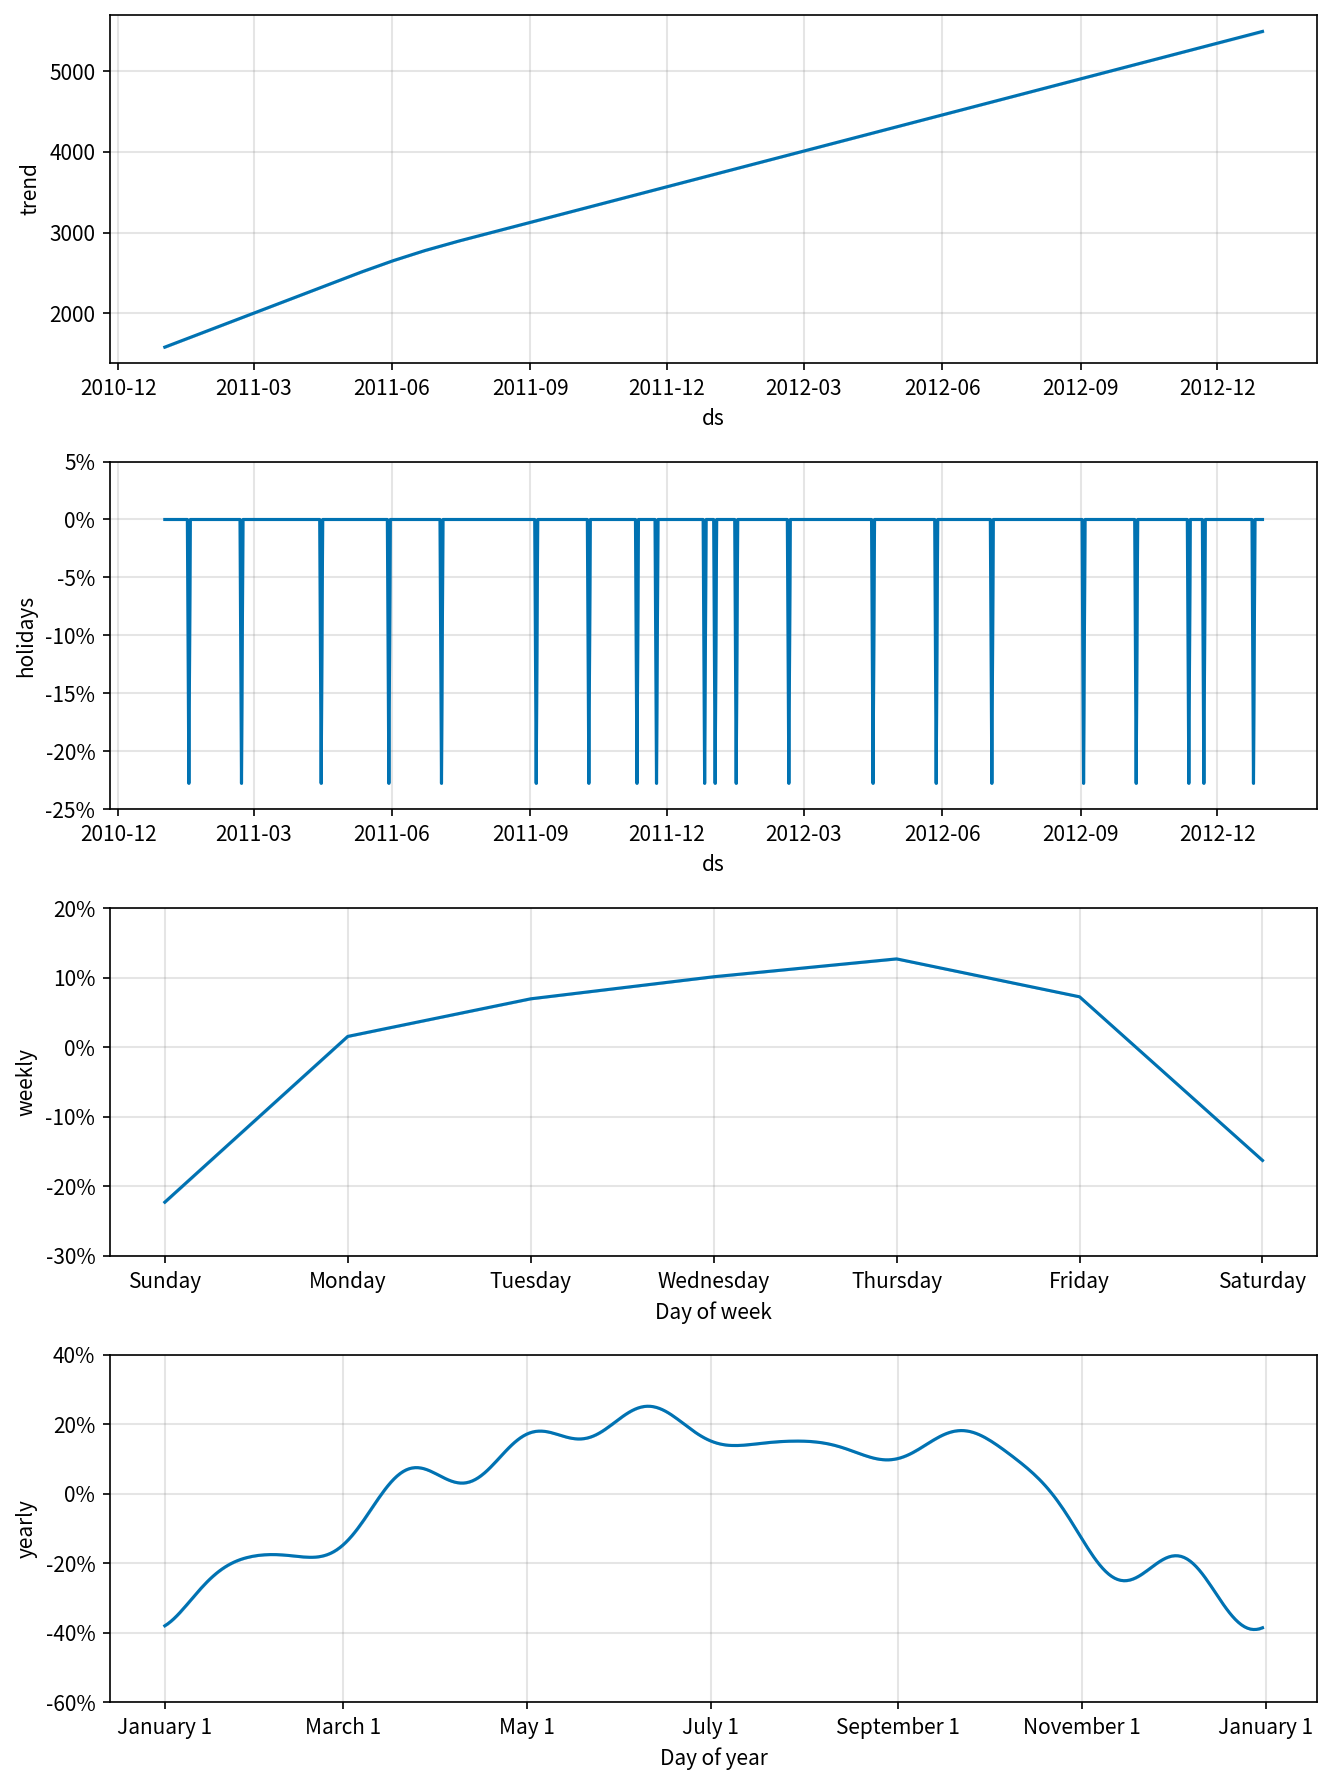

In [ ]:
#繪製圖形
fig = time_loop_holiday.plot_components(bike_pred_holiday)
plt.show()

#Evaluating holiday

In [ ]:
# ypred_holiday：只從 bike_pred_holiday 中提取預測部分
ypred_holiday = bike_pred_holiday[-61:][['yhat']].values

# 計算 R2 值
from sklearn.metrics import r2_score
score_holi = r2_score(ytest1, ypred_holiday)

# 確認結果
print(f'R2 score:{score_holi:.4f}')

R2 score:0.4146


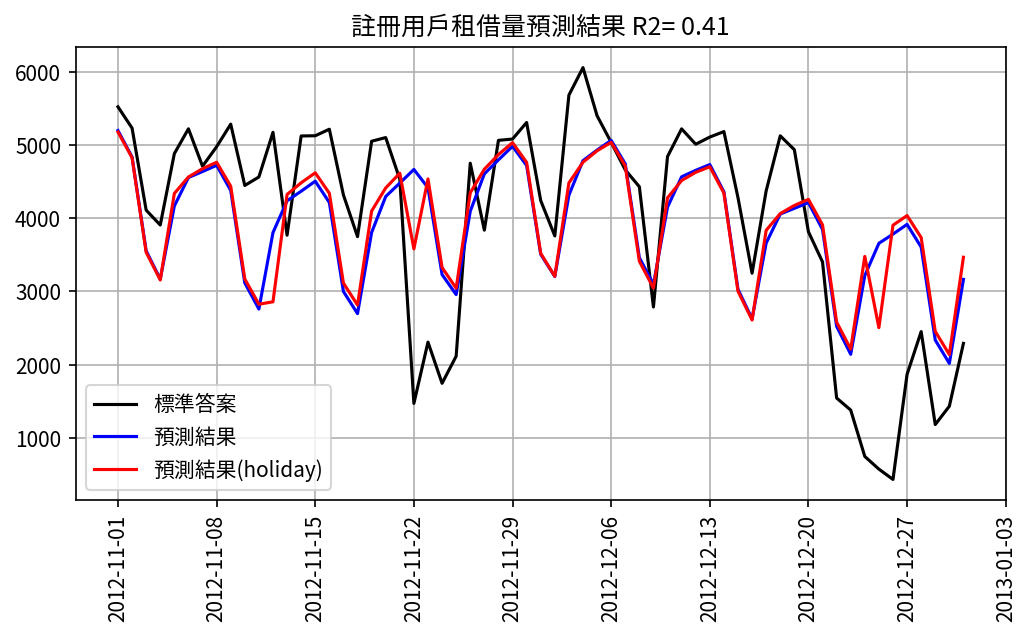

In [ ]:
#繪製比較圖形
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

# 繪製圖形
ax.plot(dates_test, ytest1, label='標準答案', c='k')
ax.plot(dates_test, ypred1, label='預測結果', c='b')
ax.plot(dates_test, ypred_holiday, label='預測結果(holiday)', c='r')

# 日期刻度間隔
# 於每週四顯示日期
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

# 將日期刻度標籤文字旋轉 90 度
ax.tick_params(axis='x', rotation=90)

# 顯示網格等
ax.grid()
ax.legend()
ax.set_title('註冊用戶租借量預測結果 R2= %.2f' %score_holi)

# 輸出畫面
plt.show()

#Adding the other variables_weather wind speed....

In [ ]:
dataset.head()

,日期,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,臨時用戶租借量,註冊用戶租借量,整體用戶租借量
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
datedata.head()

,ds,y
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518


In [ ]:
# 在訓練資料中新增「天氣」、「氣溫」、「風速」及「濕度」
df_adjust = pd.concat([datedata, dataset[['天氣', '氣溫', '風速', '濕度']]], axis=1)

# 分割輸入資料
X_train_adjust = df_adjust[traindate_filter]
X_test_adjust  = df_adjust[testdate_filter]

# 確認結果
display(X_train_adjust.head())
display(X_train_adjust.tail())

,ds,y,天氣,氣溫,風速,濕度
0,2011-01-01,654,2,0.344167,0.160446,0.805833
1,2011-01-02,670,2,0.363478,0.248539,0.696087
2,2011-01-03,1229,1,0.196364,0.248309,0.437273
3,2011-01-04,1454,1,0.200000,0.160296,0.590435
4,2011-01-05,1518,1,0.226957,0.186900,0.436957


,ds,y,天氣,氣溫,風速,濕度
665,2012-10-27,5209,2,0.530000,0.235692,0.720000
666,2012-10-28,3461,2,0.477500,0.398008,0.694583
667,2012-10-29,20,3,0.440000,0.358200,0.880000
668,2012-10-30,1009,2,0.318182,0.213009,0.825455
669,2012-10-31,5147,2,0.357500,0.166667,0.666667


In [ ]:
# 選擇演算法

time_loop_adjust = Prophet(yearly_seasonality=True, 
    weekly_seasonality=True, daily_seasonality=False,
    seasonality_mode='multiplicative', holidays = df_holiday)

# 利用 add_regressor 函式將「天氣」、「氣溫」、「風速」及「濕度」納入模型中
time_loop_adjust.add_regressor('天氣')
time_loop_adjust.add_regressor('氣溫')
time_loop_adjust.add_regressor('風速')
time_loop_adjust.add_regressor('濕度')

# 訓練
time_loop_adjust.fit(X_train_adjust)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfn6zio0c/6tkewhom.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfn6zio0c/of90ixp_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12089', 'data', 'file=/tmp/tmpfn6zio0c/6tkewhom.json', 'init=/tmp/tmpfn6zio0c/of90ixp_.json', 'output', 'file=/tmp/tmpfn6zio0c/prophet_modelq56q_rcf/prophet_model-20230117095650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:56:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:56:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 建立預測用的輸入資料
future3 = df_adjust[['ds', '天氣', '氣溫', '風速', '濕度']]

# 預測
ypred_adjust = time_loop_adjust.predict(future3)

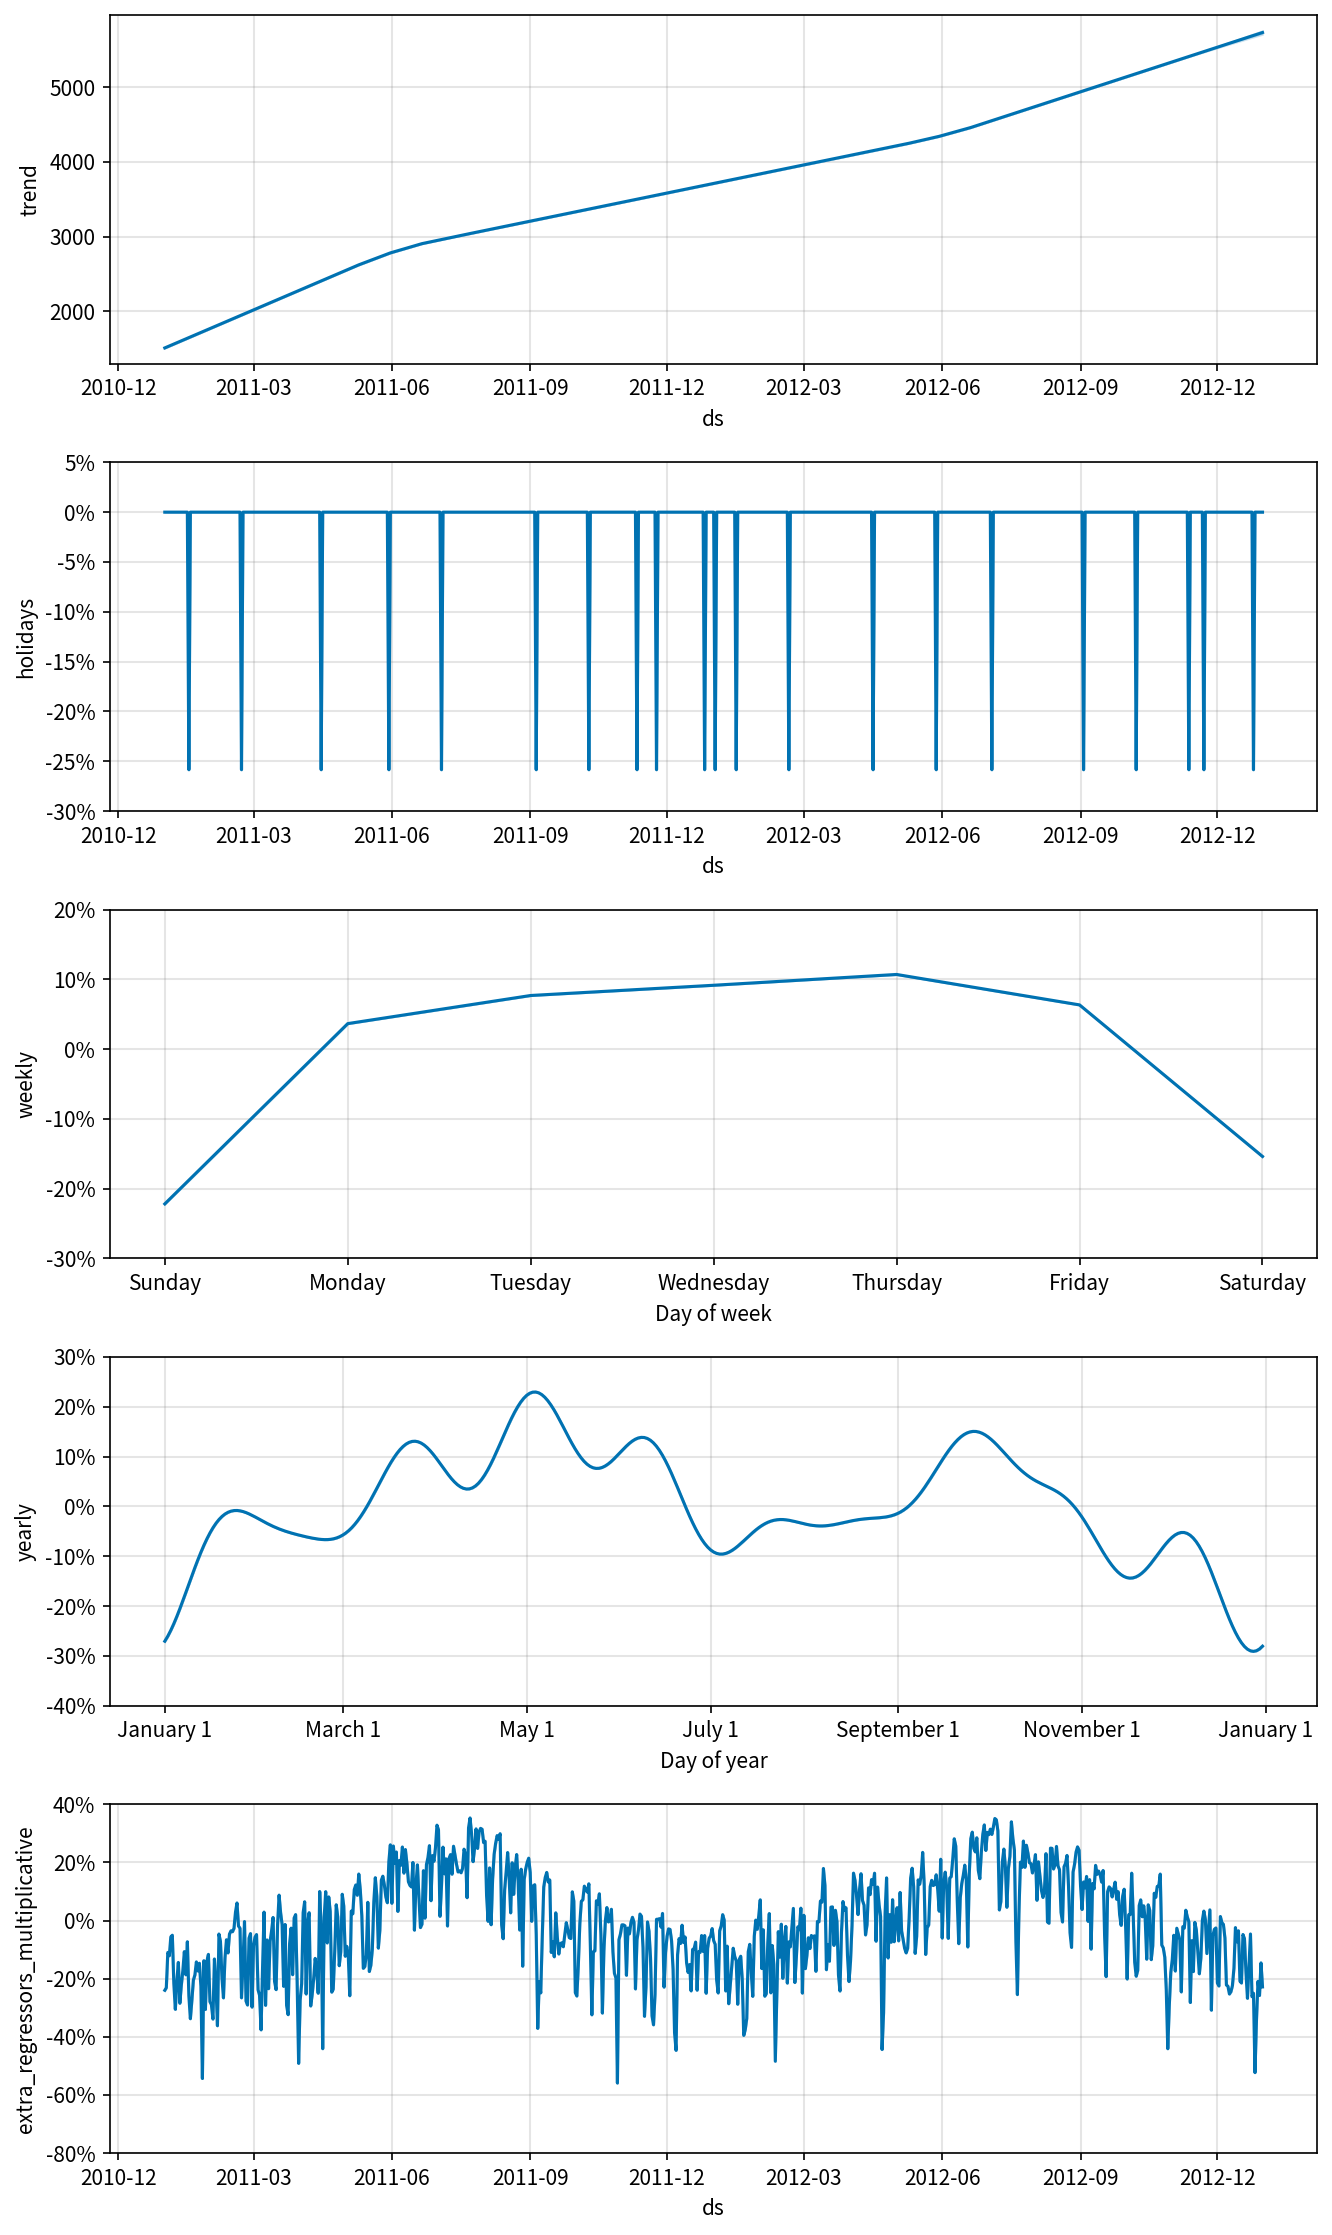

In [ ]:
# 繪製各元素的圖形
fig = time_loop_adjust.plot_components(ypred_adjust)
plt.show()

In [ ]:
# 計算 R2 值

# 只從 fcst 中提取預測部分
ypred_adjust = ypred_adjust[-61:][['yhat']].values
score3 = r2_score(ytest1, ypred_adjust)

# 確認結果
r2_text3 = f'R2 score:{score3:.4f}'
print(r2_text3)

R2 score:0.6196


In [ ]:
# 繪製時間序列圖
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 4))

# 繪製圖形
ax.plot(dates_test, ytest1, label='標準答案', c='k')
ax.plot(dates_test, ypred1, label='預測結果', c='b')
ax.plot(dates_test, ypred_holiday, label='預測結果(holiday)', c='g')
ax.plot(dates_test, ypred_adjust, label='預測結果(adjust)', c='y')

# 日期刻度間隔
# 於每週四顯示日期
weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

# 將日期刻度標籤文字旋轉 90 度
ax.tick_params(axis='x', rotation=90)

# 顯示網格等
ax.grid()
ax.legend()
ax.set_title('註冊用戶租借量預測結果  ' + r2_text3)

# 輸出畫面
plt.show()

NameError: ignored